In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.base import TransformerMixin
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
data = pd.read_csv('/Users\JAYSHREE RATHOD\Downloads/CarPrice_Assignment.csv')
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.isna().sum()/len(data)*100,2

(car_ID              0.0
 symboling           0.0
 CarName             0.0
 fueltype            0.0
 aspiration          0.0
 doornumber          0.0
 carbody             0.0
 drivewheel          0.0
 enginelocation      0.0
 wheelbase           0.0
 carlength           0.0
 carwidth            0.0
 carheight           0.0
 curbweight          0.0
 enginetype          0.0
 cylindernumber      0.0
 enginesize          0.0
 fuelsystem          0.0
 boreratio           0.0
 stroke              0.0
 compressionratio    0.0
 horsepower          0.0
 peakrpm             0.0
 citympg             0.0
 highwaympg          0.0
 price               0.0
 dtype: float64,
 2)

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


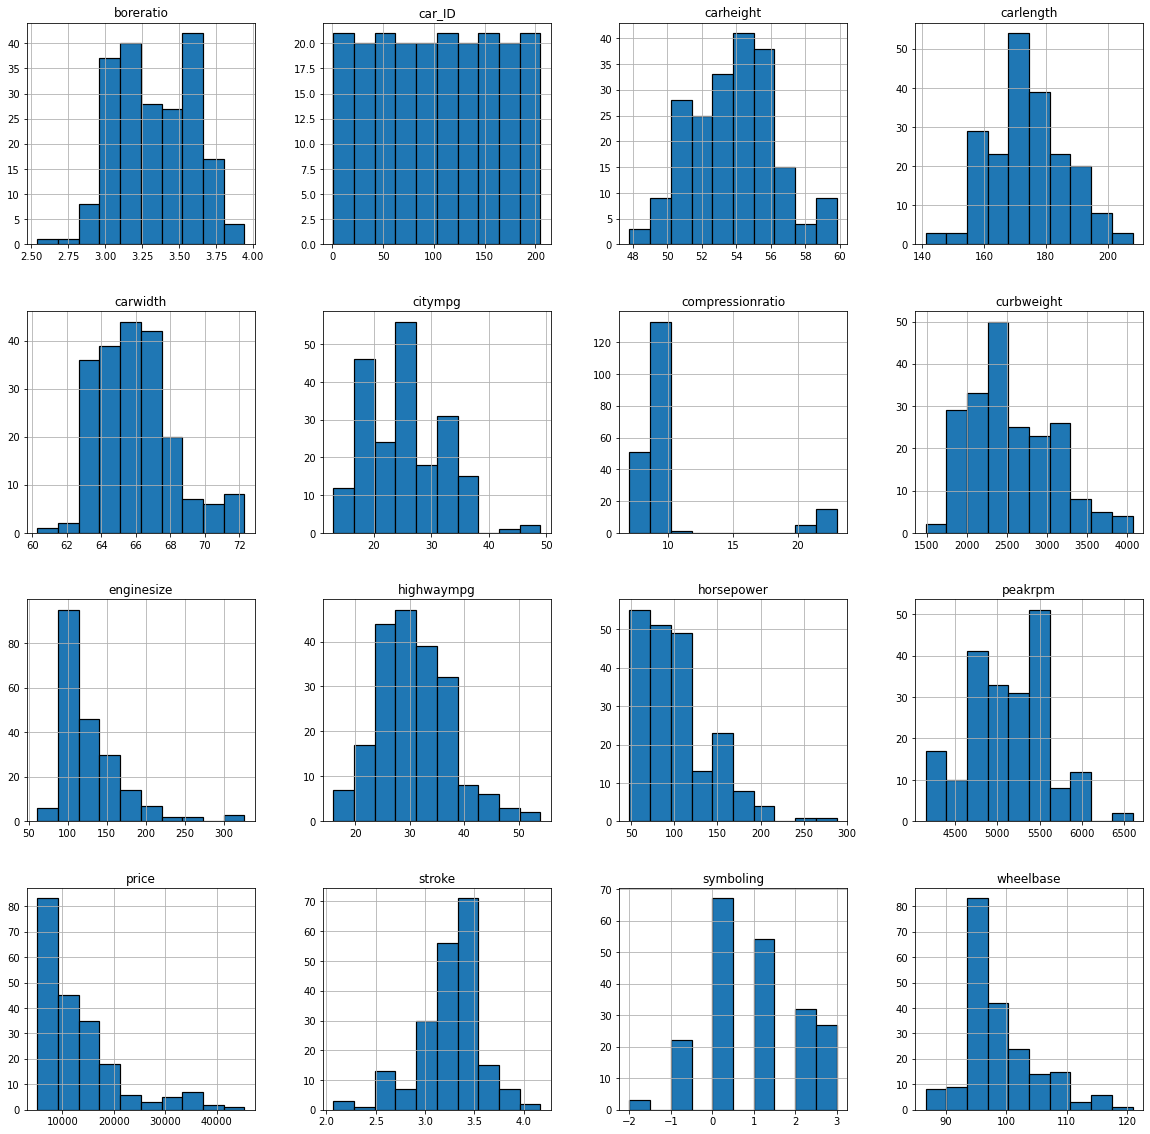

In [7]:
data.hist(edgecolor ='black',linewidth = 1.2,figsize =(20,20));

In [7]:
cat_col = data[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]

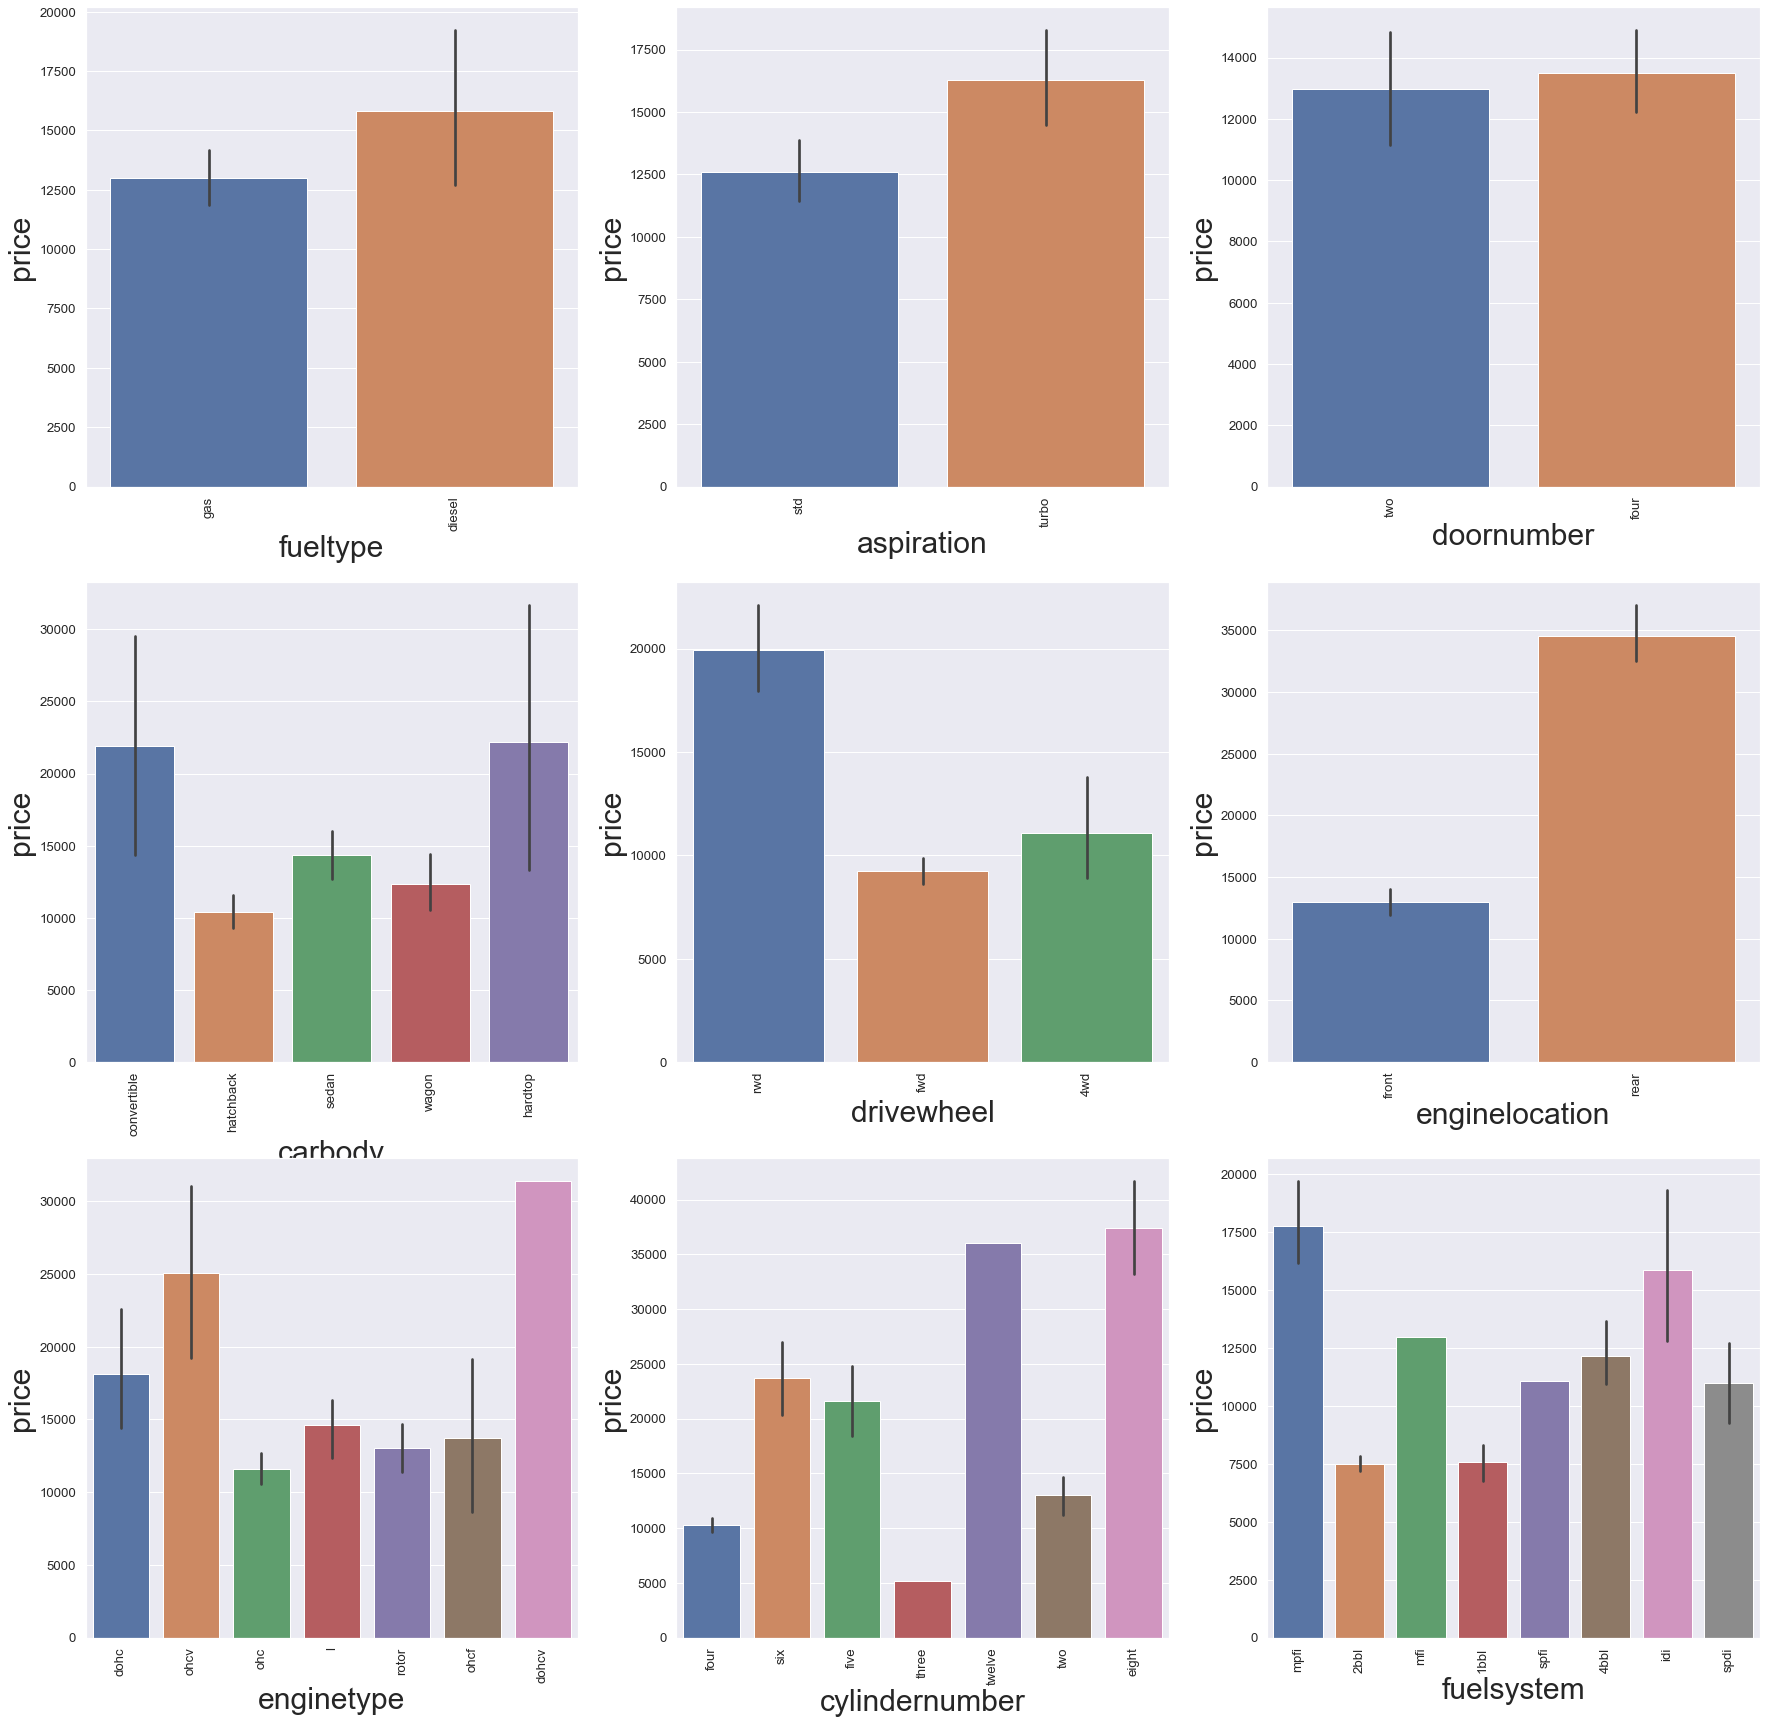

In [9]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(cat_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='price', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('price',fontsize = 30)
    plt.xlabel(f'{column}',fontsize = 30)

## Insights from categorical features visualization
- 1) Gas type car has high price as comparaed to the diesel
- 2) car with turbo type aspiration has high price
- 3) doornumber has no significant difference
- 4) hardtop and convertable body type cars are expensive than others.
- 5) price of cars with rwd drivewheel's is almost twice the price of cars with fwd and 4wd.
- 6) front engine cars are very expensive than the rear once.
- 7) cars having 3 cylinders are very cheaper than  the  price of other types.
- 8) cost for the cars with 1bbl and 2bbl fuelsystem are almost the same.
- 9)'ohc', 'l', 'rotor','ohcf',enginetype cars prices are nearly same and twice lesser than the price of 'dohcv'enginetype.

In [8]:
# Renaming the typo errors in Car Company names

data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [9]:
data['CarName'].value_counts()

toyota corona            6
peugeot 504              6
toyota corolla           6
subaru dl                4
mitsubishi g4            3
                        ..
mazda glc custom l       1
nissan nv200             1
toyota corona mark ii    1
bmw x1                   1
toyota corolla tercel    1
Name: CarName, Length: 147, dtype: int64

In [10]:
corrmat = data.corr()

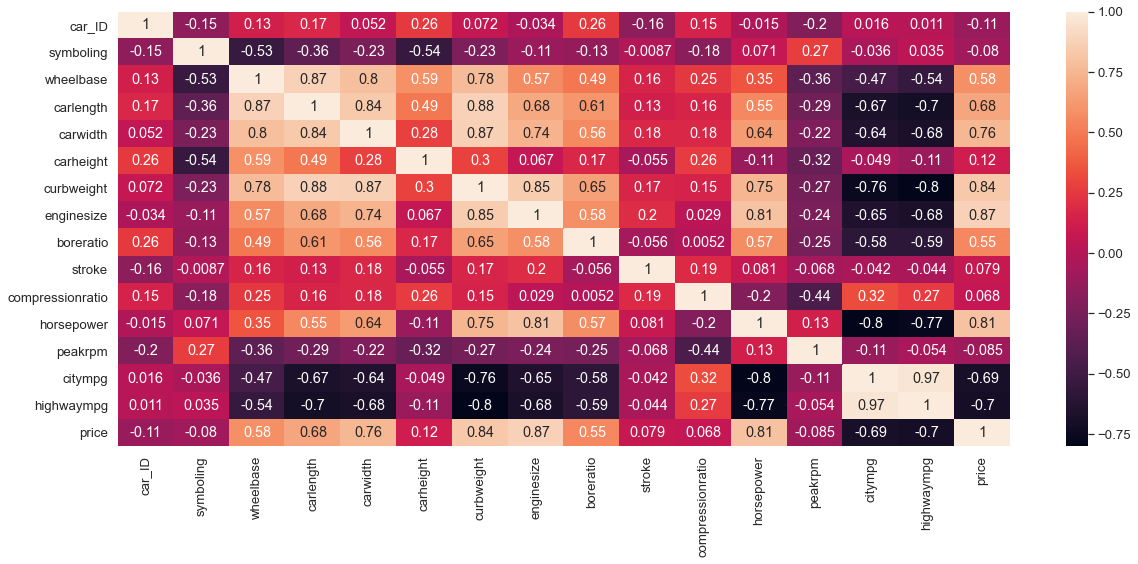

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(corrmat, annot=True)

#### It is evident that our independent features are multicolinear.

In [11]:
one_hot_encoded_df = pd.get_dummies(cat_col)
one_hot_encoded_df

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
201,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
202,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
203,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
num_cat = data.drop(['car_ID','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','fuelsystem','enginetype'],axis = 1)

In [13]:
num_cat.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)

In [14]:
final_df = pd.concat([num_cat,one_hot_encoded_df], axis=1)

In [15]:
final_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
final_df.shape

(205, 53)

In [19]:
X = final_df.drop('price',axis=1)
y = final_df['price']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

## Model:1 (Ensemble.Bagging_regressor)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(DecisionTreeRegressor(),   # here we decided the tree as predictor ans takeb as 500, bootstrap = True means we have selected bagging(without replacement) 
                          n_estimators = 500,   # max_saples = 1 means all the data is taken(pasting regressor)
                          bootstrap = True,
                          max_samples = 1.0,
                          n_jobs  = -1)

In [22]:
bag_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=500,
                 n_jobs=-1)

In [23]:
y_pred = bag_reg.predict(X_test)

df = pd.DataFrame({'Actual':y_test,
                  'Predicted':y_pred})
df.head()

,Actual,Predicted
111,15580.000,16022.861
17,36880.000,35782.298
116,17950.000,16646.790
6,17710.000,19352.714
9,17859.167,18466.200


In [24]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("predict score",score)

predict score 0.942802456214781


In [25]:
y_pred_train = bag_reg.predict(X_train)
score = r2_score(y_pred_train,y_train)
print('train prediction score',score)

train prediction score 0.9873088472513508


In [26]:
# from sklearn import metrics
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

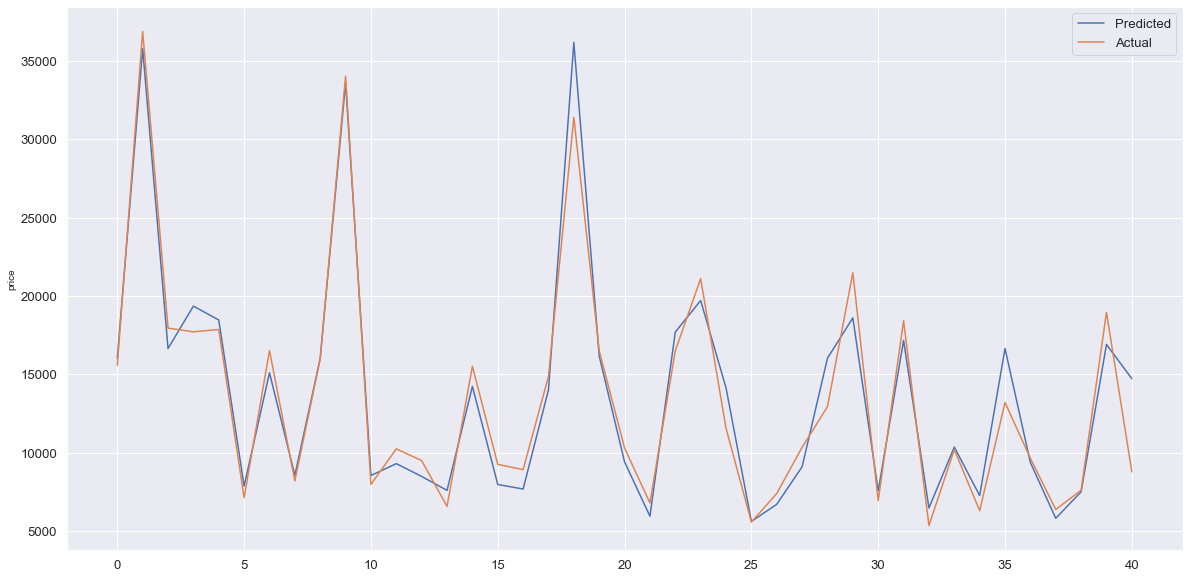

In [27]:
plt.figure(figsize=(20,10))
plt.plot(y_pred,label = 'Predicted')
plt.plot(y_test.values,label = 'Actual')

plt.ylabel('price',fontsize = 10)
plt.legend()
plt.show()

## Model:2 (DT_regressor)

In [28]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=21)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=5, random_state=21)

In [29]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

Training Accuracy for Decision Tree Regression Model:  0.9674104935921688
Testing Accuracy for Decision Tree Regression Model:  0.9219691325137461
RMSE for Training Data:  1463.2853154201362
RMSE for Testing Data:  2065.406731904084


## Model:3 (RF_regressor)


In [30]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=1500, max_depth=5, random_state=21)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=1500, random_state=21)

In [31]:
random_forest_reg = RandomForestRegressor(n_estimators=1500, max_depth=5, random_state=21)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

Training Accuracy for Random Forest Regression Model:  0.976030506786671
Testing Accuracy for Random Forest Regression Model:  0.941194477877363
RMSE for Training Data:  1254.9301366749348
RMSE for Testing Data:  1793.0046911491306


## Tuning

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestRegressor(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="neg_mean_squared_error", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestRegressor(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.6min finished


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(max_features='sqrt')

In [33]:
# Prediction with training dataset:
y_pred_RFR_train = rf_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = rf_clf.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

Training Accuracy for Random Forest Regression Model:  0.9882529328095087
Testing Accuracy for Random Forest Regression Model:  0.9692098005647757
RMSE for Training Data:  878.5264659773641
RMSE for Testing Data:  1297.4141244981831


## Voting Regressor

In [34]:
from sklearn.ensemble import VotingRegressor

In [35]:
regressor_1 = bag_reg
regressor_2 = decision_tree_reg
regressor_3 = rf_clf

regressor_1.fit(X_train,y_train)
regressor_2.fit(X_train,y_train)
regressor_3.fit(X_train,y_train)
vt_reg  = [('Bagging_regressor', regressor_1), ('DT_regressor', regressor_2), ('RF_regressor', regressor_3)]
vr = VotingRegressor(estimators=vt_reg)
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('Bagging_regressor',
                             BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                              n_estimators=500, n_jobs=-1)),
                            ('DT_regressor',
                             DecisionTreeRegressor(max_depth=5,
                                                   random_state=21)),
                            ('RF_regressor',
                             RandomForestRegressor(max_features='sqrt'))])

In [36]:
pred1 = regressor_1.predict(X_test)
pred2 = regressor_2.predict(X_test)
pred3 = regressor_3.predict(X_test)
pred4 = vr.predict(X_test)

### Finally, we will visualize the predictions. The red stars show the average prediction made by VotingRegressor.

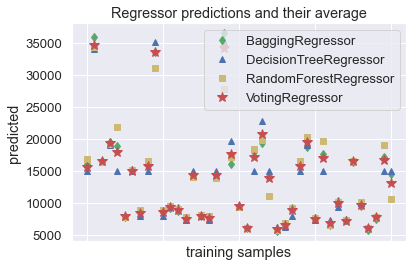

In [37]:
plt.figure()
plt.plot(pred1, 'gd', label='BaggingRegressor')
plt.plot(pred2, 'b^', label='DecisionTreeRegressor')
plt.plot(pred3, 'ys', label='RandomForestRegressor')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()